# Nigeria Houses Price Prediction

Wazobia Real Estate Limited, a leading real estate company in Nigeria, seeks your expertise to tackle one of its crucial challenges. They are determined to provide accurate and competitive pricing for houses, but accurately predicting house prices in the current market has been a hurdle they aim to overcome. Should you accept it, your mission is to develop a powerful and accurate predictive model that can estimate house prices in Nigeria.

## Importing the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Reading in the data

In [2]:
df1 = pd.read_csv('Housing_dataset_train.csv')
test_df = pd.read_csv('Housing_dataset_test.csv')

In [3]:
## Train dataset
df1.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [4]:
df1.shape

(14000, 7)

We have 14000 samples in our train dataset with 7 columns including our label(what we are trying to predict)

## Descriptive Stats For Train dataset

In [5]:
df1.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [6]:
df1.describe(include='O')

,loc,title
count,12187,12278
unique,36,10
top,Kaduna,Flat
freq,370,1372


In [7]:
## Test Dataset
test_df.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [8]:
test_df.shape

(6000, 6)

The test dataset contains 6000 samples with 6 features excluding our target variable of course.

## Descriptive Stats For Test dataset

In [9]:
test_df.describe()

,ID,bedroom,bathroom,parking_space
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4818.699167,4.329833,3.105667,3.132333
std,3832.336902,2.454733,2.033189,1.604551
min,2.000000,1.000000,1.000000,1.000000
25%,1647.000000,2.000000,1.000000,2.000000
50%,3433.000000,4.000000,2.000000,3.000000
75%,7970.000000,6.000000,5.000000,4.000000
max,12995.000000,9.000000,7.000000,6.000000


In [10]:
test_df.describe(include='O')

,loc,title
count,6000,6000
unique,36,10
top,Benue,Mansion
freq,188,673


## Exploratory Data Analysis (EDA)


In [11]:
## Dropping irrelevant columns and passing it to a new varibale so our original dataset remains intact

df2 = df1.drop('ID', axis=1)

In [12]:
## Checking for duplicate samples in the train dataset and drop 1 of the duplicates

def remove_train_duplicate(data):
    print(f'No. of Rows - Before Removing Duplicates:{data.shape[0]:,}')
    data.drop_duplicates(keep='first', inplace = True)
    print(f'No. of Rows - After Removing Duplicates: {data.shape[0]:,}')
    

remove_train_duplicate(df2)


No. of Rows - Before Removing Duplicates:14,000
No. of Rows - After Removing Duplicates: 13,900


**Inspecting the datasets**

In [13]:
## Inspecting our train dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13900 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            12117 non-null  object 
 1   title          12185 non-null  object 
 2   bedroom        12103 non-null  float64
 3   bathroom       12097 non-null  float64
 4   parking_space  12093 non-null  float64
 5   price          13900 non-null  float64
dtypes: float64(4), object(2)
memory usage: 760.2+ KB


In [14]:
## Inspecting our train dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


There are some missing values in the train dataset which we will handle appropriately. For the test dataset, there are no missing values.

---
### Handling missing values in each feature

In [15]:
df2.isna().sum()

loc              1783
title            1715
bedroom          1797
bathroom         1803
parking_space    1807
price               0
dtype: int64

We have quite a lot of missing values in our dataset which we will handle appropriately so as to build a very good predictive model

**Location (loc)**

In [16]:
len(df2['loc'].value_counts())

36

So, we have 36 different locations in our dataset which represents each state in Nigeria. Great

Now, we'll be dropping rows with missing values in the `loc` column

In [17]:
## Dropping rows with null values in 'loc' column

df3 = df2.dropna(subset='loc')
df3.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


---
**Title (title)**

We will be replacing each null values in the `title` column with the mode title of its respective location. That is; most common title in each location

In [18]:
## Group by 'loc' and calculate the mode title for each group
mode_title_by_location = df3.groupby('loc')['title'].apply(lambda x: x.mode().iloc[0])

# Iterate through the DataFrame and fill missing 'title' values based on location
for index, row in df3.iterrows():
    if pd.isnull(row['title']):
        df3.at[index, 'title'] = mode_title_by_location.get(row['loc'])


In [19]:
df3.isna().sum()

loc                 0
title               0
bedroom          1742
bathroom         1730
parking_space    1737
price               0
dtype: int64

---
**Bedroom (bedroom)**

For, the null values in the `bedroom` column, we will fill each null value column with the median bedroom count of its particular 'title' within its 'location'.

In [20]:
## A function to fill missing values in bedroom column....
def fill_missing_bedroom(group):
    median_bedroom = group['bedroom'].median()
    group['bedroom'].fillna(median_bedroom, inplace=True)
    return group



## Grouped by 'title' and 'loc', then applied the fill_missing_bedroom function
df3 = df3.groupby(['title', 'loc']).apply(fill_missing_bedroom).reset_index(drop=True)


In [21]:
df3.isna().sum()

loc                 0
title               0
bedroom             0
bathroom         1730
parking_space    1737
price               0
dtype: int64

--- 
**Bathroom (bathroom)**

For, the null values in the `bathroom` column, we will fill each null value column with the median bathroom count of its particular 'title' within its 'location', just like we did for bedroom

In [22]:
## A function to fill missing values in bathroom column....
def fill_missing_bathroom(group):
    median_bathroom = group['bathroom'].median()
    group['bathroom'].fillna(median_bathroom, inplace=True)
    return group



## Grouped by 'title' and 'loc', then applied the fill_missing_bathroom function
df3 = df3.groupby(['title', 'loc']).apply(fill_missing_bathroom).reset_index(drop=True)


In [23]:
df3.isna().sum()

loc                 0
title               0
bedroom             0
bathroom            0
parking_space    1737
price               0
dtype: int64

---
**Parking Space (parking_space)**

We will fill the missing values in the `parking_space` column with the median parking_space count of its particular 'title' within its 'location'

In [24]:
## A function to fill missing values in bathroom column....
def fill_missing_parking_space(group):
    median_parking_space = group['parking_space'].median()
    group['parking_space'].fillna(median_parking_space, inplace=True)
    return group



## Grouped by 'title' and 'loc', then applied the fill_missing_bathroom function
df3 = df3.groupby(['title', 'loc']).apply(fill_missing_parking_space).reset_index(drop=True)


In [25]:
df3.isna().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

Now, we are done handling missing values in our dataset

### Checking For Errors Inputs (Anomalies) 

We will subset for rows where number of 'bathrooms' in a house is greater than the 'number of bedrooms + 2' and remove them from our dataset, because that cannot possible in real life so they are probably anomalies.

In [26]:
## Subset for rows where number of 'bathrooms' in a house is greater than the 'number of bedrooms + 2' 

df3[(df3['bathroom']> df3['bedroom']+2)]

,loc,title,bedroom,bathroom,parking_space,price
19,Kaduna,Flat,4.0,7.0,2.0,1790256.208
31,Osun,Semi-detached duplex,3.0,7.0,3.0,1751635.699
39,Delta,Mansion,3.0,6.0,1.0,4223442.423
45,Bauchi,Mansion,4.0,7.0,2.0,3822595.558
57,Kano,Mansion,1.0,6.0,3.0,2687046.276
...,...,...,...,...,...,...
12106,Kebbi,Terrace duplex,4.0,7.0,2.0,1581061.171
12108,Zamfara,Detached duplex,4.0,7.0,3.0,1601556.469
12112,Edo,Bungalow,4.0,7.0,4.0,2367927.861
12113,Kaduna,Apartment,4.0,7.0,5.0,2228516.471


In [27]:
## Removing those anomalies in our train dataset and passing it into a new dataframe
train_df = df3[~(df3['bathroom']> df3['bedroom']+2)]


---
## Data Visualization
**Now that we have cleaned our data, let's perform some visualization to gain more insights**

In [28]:
train_df.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,3.5,2.0,4.0,1672416.689
2,Ekiti,Detached duplex,7.0,5.0,3.0,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898


**Distribution of Prices**

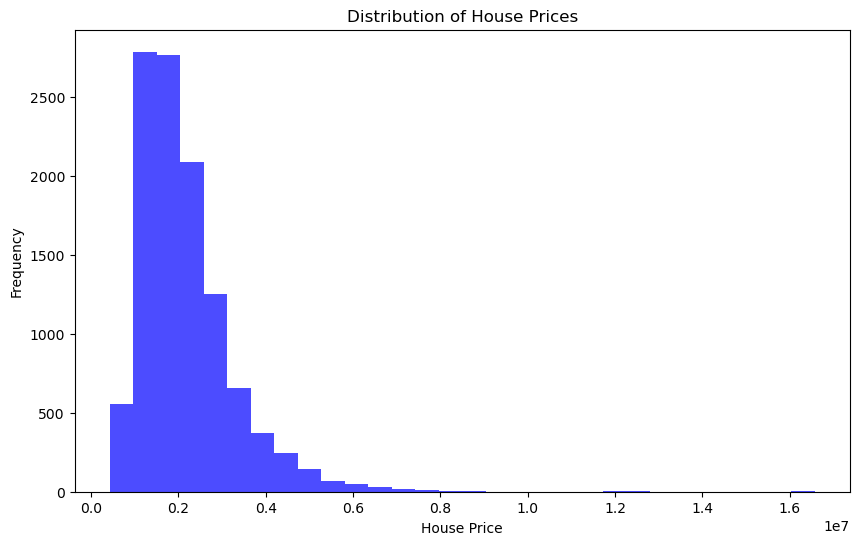

In [82]:
# Create a histogram to visualize the distribution of house prices
plt.figure(figsize=(10, 6))
plt.hist(train_df['price'], bins=30, color='blue', alpha=0.7)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()



From the distribution of house prices, it is evident that a significant proportion of the houses fall within the price range of 1 million (1M) to 2 million (2M). This range appears to be the most common price bracket, with a notable concentration of houses. This insight suggests that a substantial portion of the housing market caters to potential buyers looking for properties in the affordable to moderately priced segment. Understanding this concentration of prices can aid in tailoring marketing strategies and pricing decisions to effectively target and engage this particular market segment

---
**Plotting for the distribution of houses by location**

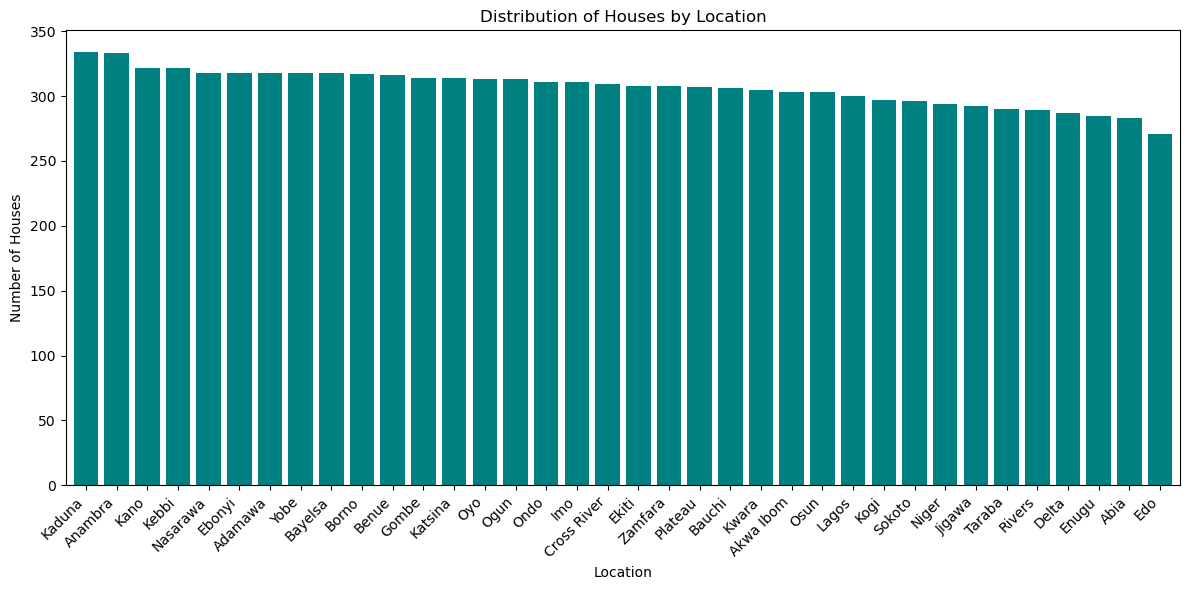

In [92]:
# Group the data by location and count the number of houses in each location
location_counts = train_df['loc'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='teal', width=0.8)
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



The distribution of houses across different locations appears to be relatively uniform, with a comparable number of houses in each location. This suggests that the real estate market in this area is well-distributed and does not exhibit significant concentration in specific locations.

---

**Plotting for the Average Price of House by Location**

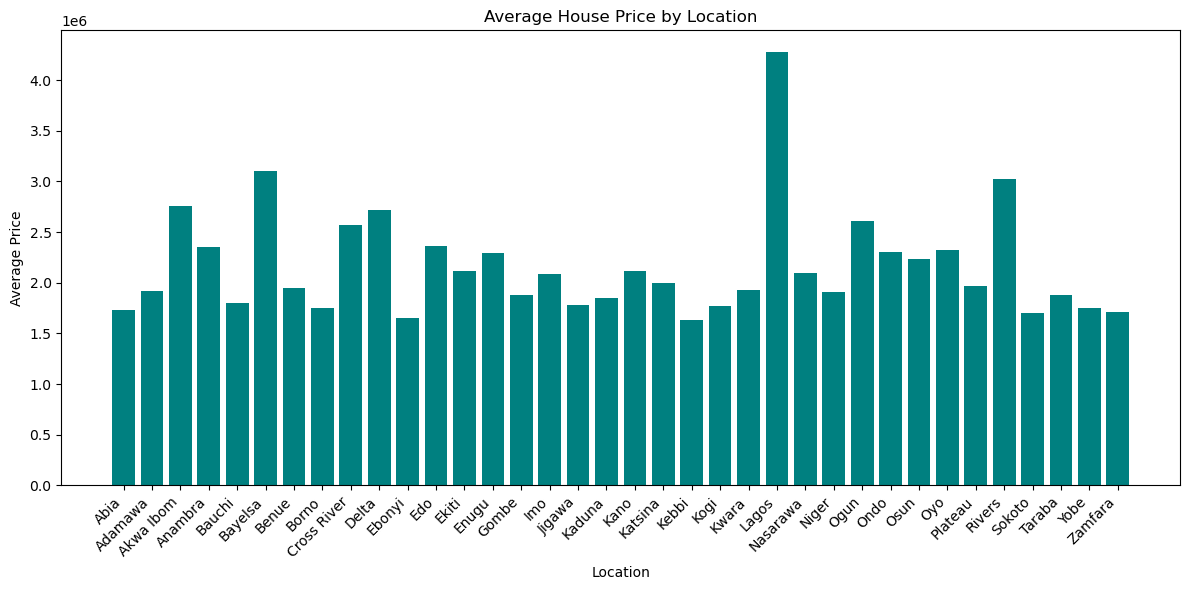

In [95]:

# Group by 'loc' and calculate the average house price for each location
avg_price_by_loc = train_df.groupby('loc')['price'].mean().reset_index()
avg_price_by_loc.columns = ['Location', 'Average_house_price']

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(avg_price_by_loc['Location'], avg_price_by_loc['Average_house_price'], color='teal')
ax.set_xticklabels(avg_price_by_loc['Location'], rotation=45, ha='right')
ax.set_xlabel('Location')
ax.set_ylabel('Average Price')
ax.set_title('Average House Price by Location')

plt.tight_layout()
plt.show()


From the visualization of average house prices by location, several interesting insights can be drawn:

Lagos Tops the List: Unsurprisingly, Lagos stands out with the highest average house price, significantly surpassing other states. This could be attributed to its status as a major economic hub and commercial center in Nigeria.

Regional Disparities: There is a noticeable variation in average house prices across different states. Southern states like Lagos, Bayelsa, and Rivers tend to have higher average prices compared to some northern states like Kebbi, Yobe, and Zamfara.

Urban Influence: Urbanized and developed states like Lagos, Akwa Ibom, and Rivers generally command higher average house prices. These areas might be more attractive to residents due to better infrastructure, amenities, and economic opportunities.

Economic Factors: States with higher average house prices could indicate stronger economic activity and purchasing power. The relative prosperity in these areas might contribute to higher property values.

Growth Potential: States with lower average house prices, while more affordable, might represent growth opportunities for real estate investments. These areas could experience future development and potential appreciation in property values.

Regional Trends: There seems to be a trend of higher average house prices in southern states compared to northern states. This could be due to factors such as population density, economic activities, and demand for real estate.

Diverse Factors: Average house prices are influenced by a combination of factors, including economic conditions, population density, infrastructure, location desirability, and more.

Real Estate Market Dynamics: Understanding the disparities in average house prices can guide real estate investors, developers, and policymakers in making informed decisions about property investments, development projects, and market strategies.

It's important to note that these insights are based on the analysis of average house prices and do not capture the entire complexity of the real estate market in Nigeria. Further analysis and context-specific knowledge would provide a deeper understanding of the underlying factors driving these patterns.

---

**Plotting for the Average Price of House by Title(house type)**

In [61]:
## Group by 'title' and calculate the average house price for each title
avg_price_by_loc = train_df.groupby('title')['price'].mean().reset_index()
avg_price_by_loc.columns = ['House Type', 'Average_house_price']

## Create a bar plot for the data
fig = px.bar(avg_price_by_loc, x='House Type', y='Average_house_price', title='Average House Price by Title(House Type)')
fig.update_layout(xaxis_title='House Type', yaxis_title='Average Price', xaxis_tickangle=-45)

fig.show()

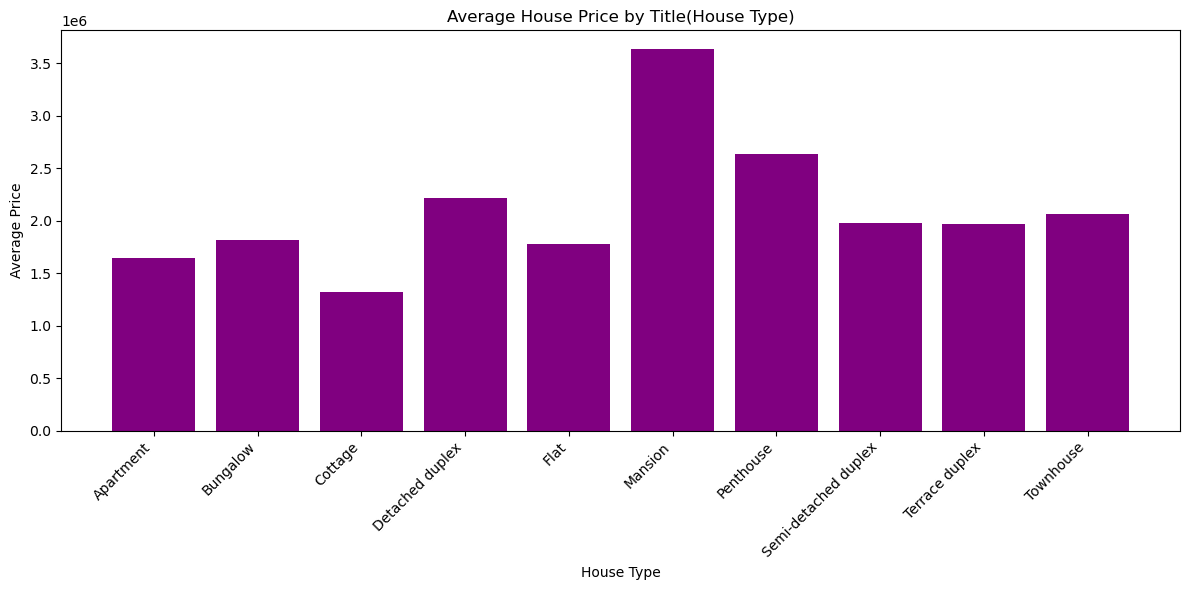

In [97]:
# Group by 'title' and calculate the average house price for each title
avg_price_by_title = train_df.groupby('title')['price'].mean().reset_index()
avg_price_by_title.columns = ['House Type', 'Average_house_price']


# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(avg_price_by_title['House Type'], avg_price_by_title['Average_house_price'], color='purple')
ax.set_xticklabels(avg_price_by_title['House Type'], rotation=45, ha='right')
ax.set_xlabel('House Type')
ax.set_ylabel('Average Price')
ax.set_title('Average House Price by Title(House Type)')
plt.tight_layout()
plt.show()


The dataset encompasses a wide range of house types with varying average prices. This diversity reflects the different preferences and affordability levels of potential buyers or renters.

Mansion: has the Highest Average Price: Among the different house types, "Mansion" stands out with the highest average house price of approximately ₦3,630,393. This suggests that mansions are generally associated with luxury and exclusivity, which can contribute to their premium pricing.


Penthouse: "Penthouse" also commands a significant average price (around ₦2,635,754), indicating that penthouses are sought-after for their upscale and luxurious living experience, often offering spacious layouts and stunning views.

Detached and Semi-Detached Duplexes: Both "Detached duplex" and "Semi-detached duplex" categories have notable average prices (around ₦2,223,799 and ₦1,981,348, respectively). This could imply that duplex-style homes, whether detached or semi-detached, come with higher price tags, possibly due to larger sizes and additional amenities.

Townhouses and Terrace Duplexes: "Townhouse" and "Terrace duplex" have average prices around ₦2,065,928 and ₦1,972,598, respectively. These options may represent a balance between space, privacy, and affordability for potential homeowners.

Preference for Standalone Bungalows: "Bungalow" holds an average price of approximately ₦1,812,480. This suggests that there is demand for standalone single-story homes that offer easy access and spacious living without the need for stairs.

Flats and Apartments: "Flat" and "Apartment" categories have average prices of around ₦1,764,481 and ₦1,669,068, respectively. These options could be popular among individuals or small families seeking more compact living spaces.

Cottage for Cozy Living: "Cottage" stands out with a relatively lower average price (around ₦1,319,260), possibly appealing to those who prefer a cozy and quaint living environment.

These insights shed light on the diverse preferences of potential homebuyers or renters, with luxury options such as mansions and penthouses commanding higher prices, while a variety of other options cater to different needs and lifestyles. The variation in average prices by house type provides valuable information for Wazobia Real Estate Limited to make informed pricing decisions and effectively cater to a range of clientele.

---

## Feature engineering

We will be engineering some new features into our datasets from the raw data to make it more suitable and informative for our prediction model. 

In [33]:
## creating a new feature 'total_area' by adding up number of 'bedrooms, bathrooms and parking_space'
train_df['total_area'] = train_df['bedroom'] + train_df['bathroom'] + train_df['parking_space']
test_df['total_area'] = test_df['bedroom'] + test_df['bathroom'] + test_df['parking_space']

## creating a new feature 'avg_bathrooms_per_bedroom' by dividing total number of 'bathrooms' by total number of'bedrooms'
train_df['avg_bathrooms_per_bedroom'] = train_df['bathroom'] / train_df['bedroom']
test_df['avg_bathrooms_per_bedroom'] = test_df['bathroom'] / test_df['bedroom']


train_df.head()

,loc,title,bedroom,bathroom,parking_space,price,total_area,avg_bathrooms_per_bedroom
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,5.0,1.000000
1,Ondo,Apartment,3.5,2.0,4.0,1672416.689,9.5,0.571429
2,Ekiti,Detached duplex,7.0,5.0,3.0,3364799.814,15.0,0.714286
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,11.0,0.400000
4,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,16.0,1.000000


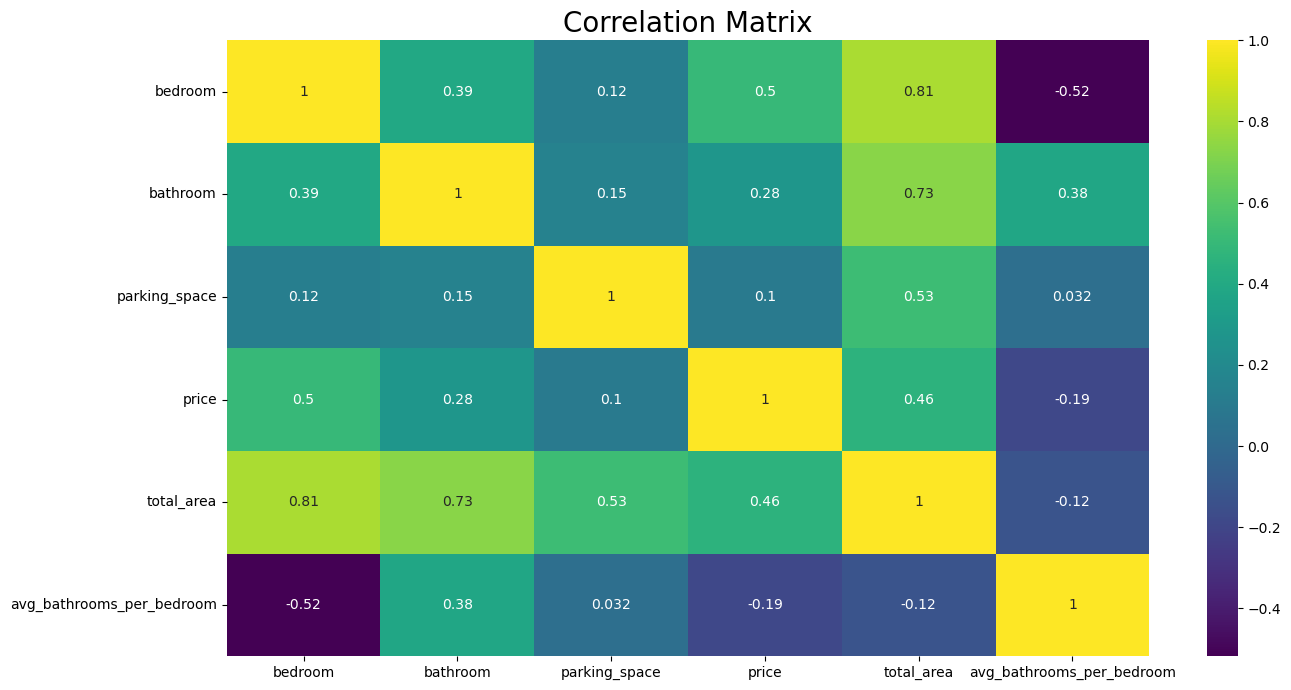

In [34]:
plt.figure(figsize=(14,7))
sns.heatmap(train_df.corr(), annot=True, cmap='viridis')   #Correlation of the data (numeric data)
plt.title('Correlation Matrix', fontsize=20)
plt.tight_layout()

This correlation matrix shows the pairwise correlations between different features in the dataset. Correlation measures the strength and direction of the linear relationship between two variables. Here are some insights from the correlation matrix:

- Price and Bedroom: There is a moderate positive correlation (0.50) between the price of the house and the number of bedrooms. This suggests that houses with more bedrooms tend to have higher prices.

- Price and Total Area: There is a moderate positive correlation (0.46) between the price of the house and the total area. This indicates that larger houses tend to have higher prices.

- Price and Bathroom: There is a moderate positive correlation (0.28) between the price of the house and the number of bathrooms. This indicates that houses with more bathrooms tend to have higher prices.

- Bedroom and Bathroom: There is a moderate positive correlation (0.39) between the number of bedrooms and the number of bathrooms. This suggests that houses with more bedrooms tend to have more bathrooms, which is quite intuitive.

- Bedroom and Avg Bathrooms per Bedroom: There is a strong negative correlation (-0.52) between the number of bedrooms and the average number of bathrooms per bedroom. This means that houses with more bedrooms tend to have fewer bathrooms per bedroom, and vice versa.

- Bedroom and Total Area: There is a strong positive correlation (0.81) between the number of bedrooms and the total area of the house. This suggests that larger houses tend to have more bedrooms.

- Bathroom and Total Area: There is a strong positive correlation (0.73) between the number of bathrooms and the total area of the house. This indicates that larger houses tend to have more bathrooms.

- Parking Space and Total Area: There is a moderate positive correlation (0.53) between the number of parking spaces and the total area of the house. This suggests that larger houses tend to have more parking spaces.

- Price and Avg Bathrooms per Bedroom: There is a weak negative correlation (-0.19) between the price of the house and the average number of bathrooms per bedroom. This suggests that houses with more bathrooms per bedroom may have slightly lower prices.

Overall, the correlation matrix provides valuable insights into the relationships between different features in the dataset.

According to the correlation matrix on the numeric columns, `bedroom` is most correlated to out target 'price', followed by `total_area`

## Model Building

In [35]:
df_train = train_df.copy()
df_test = test_df.drop('ID', axis=1)




**Applying log transformation to the 'price' column**

By taking the logarithm of the 'price' column, we can compress the scale of the data and reduce the impact of extreme values, making the relationship between the features and the target variable more linear. 

In [36]:
# Apply log transformation to the 'price' column
df_train['log_price'] = np.log1p(df_train['price'])
df_train.drop(columns=['price'], inplace=True)

df_train.head()

,loc,title,bedroom,bathroom,parking_space,total_area,avg_bathrooms_per_bedroom,log_price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,5.0,1.000000,13.955273
1,Ondo,Apartment,3.5,2.0,4.0,9.5,0.571429,14.329781
2,Ekiti,Detached duplex,7.0,5.0,3.0,15.0,0.714286,15.028879
3,Anambra,Detached duplex,5.0,2.0,4.0,11.0,0.400000,14.695265
4,Kogi,Terrace duplex,5.0,5.0,6.0,16.0,1.000000,14.771292


In [37]:
df_train.columns

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'total_area',
       'avg_bathrooms_per_bedroom', 'log_price'],
      dtype='object')

In [38]:
## Selecting input columns and target column 

input_cols = ['loc', 'title', 'bedroom', 'bathroom', 'parking_space',
               'total_area', 'avg_bathrooms_per_bedroom']
target_col = 'log_price'


train_input = df_train[input_cols]
test_input = df_test[input_cols]
train_target = df_train[target_col]

In [39]:
num_col = ['bedroom', 'bathroom', 'parking_space',
            'total_area', 'avg_bathrooms_per_bedroom']

cat_col =['loc', 'title']

### Scaling and Encoding our Inputs

In [40]:
## Scale the numeric inputs using StandardScaler
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()

train_input[num_col] = scaler.fit_transform(train_input[num_col])
test_input[num_col] = scaler.fit_transform(test_input[num_col])

In [41]:
## Encoding the categorical inputs using One-Hot Encoding(get_dummies)

train_dummies = pd.get_dummies(train_input[cat_col])
test_dummies = pd.get_dummies(test_input[cat_col])
train_dummies.head()

,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,loc_Cross River,loc_Delta,...,title_Apartment,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Now that we have scaled the numeric inputs and encoded the categorical inputs, we merge them using a pandas method 'concat()'.

In [42]:
## Merging our scaled and encoded inputs
train_data =  pd.concat([train_dummies, train_input], axis=1)
test_data =  pd.concat([test_dummies, test_input], axis=1)

## We will be dropping the the original 'loc & title' columns since we've encoded each value in them
train_data.drop(columns=cat_col, inplace=True)
test_data.drop(columns=cat_col, inplace=True)

In [43]:
train_data.head()

,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,loc_Cross River,loc_Delta,...,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,bedroom,bathroom,parking_space,total_area,avg_bathrooms_per_bedroom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-1.094769,-0.432622,-1.429773,-1.384062,0.447209
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.430412,-0.432622,0.585927,-0.217765,-0.337018
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.119756,1.320140,-0.085973,1.207710,-0.075609
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.233946,-0.432622,0.585927,0.171001,-0.650709
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.233946,1.320140,1.929728,1.466887,0.447209


In [44]:
## Assigning train_data(inputs) to 'X' and assigning train_target(target) to 'y'
X = train_data
y = train_target

Now, we'll split our train dataset into train and validation sets since our test data doesn't have the target column in it and we will need to evaluate the accuracy of our model before using it to predicts on our test data.

We'll split in the percentage of 80-20, that is; 80% of the data for training and 20% for validation.

In [45]:
## Splitting into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
print('X_train Shape: {}'.format(X_train.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('X_val Shape: {}'.format(X_val.shape))
print('Y_val Shape: {}'.format(Y_val.shape))

X_train Shape: (8834, 51)
Y_train Shape: (8834,)
X_val Shape: (2209, 51)
Y_val Shape: (2209,)


The train dataset has properly been splitted into train and validation sets

---

## Training and Evaluating the Model Performance

In [47]:
from sklearn.metrics import mean_squared_error


## creating a custom function to train and evaluate the performance of our model using 'RMSE'
def evaluate(train_x, train_y, val_x, val_y, model):
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    val_pred = model.predict(val_x)
    rmse_train = np.sqrt(mean_squared_error(train_pred, train_y))
    rmse_val = np.sqrt(mean_squared_error(val_pred, val_y))
    print('Train RMSE : {}'.format(rmse_train))
    print('Validation RMSE : {}'.format(rmse_val))
    


### Using Support Vector Regressor (SVR)

In [48]:
##import svr
from sklearn.svm import SVR

## create an instance of the SVR class
svr_model = SVR(C=10, coef0=-1, degree=2, epsilon=0.01, gamma='auto', kernel='linear', tol=1e-05)

## Evalute the model with the custom evaluation function created above
evaluate(X_train, Y_train,X_val, Y_val, svr_model)

Train RMSE : 0.20576353468531708
Validation RMSE : 0.21110477236859926


In [49]:
## get our model's predictions and store them in a variable 'log_predictions' because we applied log transformation to our target earlier
log_predictions = svr_model.predict(test_data)

# Apply reverse transformation to obtain predictions in the original price scale
original_predictions30 = np.expm1(log_predictions)

original_predictions30

array([2276492.83468153, 1106587.98710601, 1311971.64605015, ...,
       2017938.88906935, 1366919.86588767, 3269476.94613983])

In [50]:
## creating a dataframe with 2 columns 'ID' and its predicted price
submission_data = pd.DataFrame({'ID': test_df['ID'], 'Price': original_predictions30})

#submission_data to csv file
submission_data.to_csv('test_predictions30.csv', index=False)

### Using XGBoost Regressor

In [51]:
from xgboost import XGBRegressor
xgbmodel = XGBRegressor(subsample=0.6, reg_lambda=10, reg_alpha=0.01, n_estimators=300, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.2, colsample_bytree=0.8)


In [76]:
evaluate(X_train, Y_train,X_val, Y_val, xgbmodel)

Train RMSE : 0.18625366296163953
Validation RMSE : 0.19878235952033774


## Feature Importance

In [52]:
xgbmodel.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [53]:
# Get feature importance scores
feature_importance = xgbmodel.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

#Rearranging the dataframe in descending order based of the feature importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [54]:
## Plot for Feature Importance
fig = px.bar(feature_importance_df, x='Feature', y='Importance', title='Feature Importance On House Price Prediction')
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance', xaxis_tickangle=-45, width=1200, height=600)

fig.show()

`Title_Mansion` has the highest feature importance with a value of 0.074971. This suggests that the type of house being a Mansion plays a significant role in predicting the house price. Properties labeled as Mansions tend to have higher prices compared to other house types.

`The number of bedrooms (feature bedroom)` is the second most important feature with an importance of 0.071288. The number of bedrooms in a property is a crucial factor in determining its price, as larger properties with more bedrooms are generally more expensive.

`Title_Penthouse` is the third most important feature with an importance of 0.067058. Penthouse properties often offer luxurious amenities and exclusive features, leading to higher prices.

`The location of Lagos (feature loc_Lagos)` has considerable importance (0.060300) in predicting house prices. Lagos, being a major economic and commercial hub in Nigeria, tends to have higher property prices compared to other locations.

Other location features, such as `Akwa Ibom, Bayelsa, and Kebbi`, also play significant roles in predicting house prices, suggesting that the location of a property is a crucial factor in its valuation.

`Total area (feature total_area)` is another important predictor with an importance of 0.037996. Larger properties with more total area generally command higher prices.

Features related to the type of property, such as `title_Apartment, title_Detached duplex, title_Cottage, and title_Bungalow`, also contribute to predicting house prices, indicating that the architectural style of a property impacts its price.

Features with relatively lower importances, `like bathroom, parking_space, avg_bathrooms_per_bedroom, etc.`, still have some influence on the predictions but are not as crucial as the top features.

In conclusion, this analysis provides valuable insights into the factors influencing house prices. The features related to the property type, location, and size are of utmost importance in predicting house prices. Understanding these influential factors can help real estate companies make informed decisions, such as pricing their properties competitively and enhancing customer satisfaction.

Executive Report: House Price Prediction Project

1. Introduction:
This report presents the findings and insights from our House Price Prediction project. The goal of the project was to develop a predictive model that accurately estimates house prices based on various features. We utilized a dataset containing information about different properties and their corresponding prices.

2. Exploratory Data Analysis (EDA) Insights:
During the exploratory phase, we delved into the dataset to understand its characteristics. We identified a variety of features, including property location, number of bedrooms, bathrooms, parking spaces, and more. Some key insights from our EDA include:
- The distribution of house prices is skewed, indicating the presence of high-end properties.
- Location and property type play a significant role in determining prices.
- Certain features, such as the number of bedrooms and bathrooms, show correlations with the target variable.

3. Feature Engineering:
To enhance the predictive power of our model, we engineered several features, such as the total area of each property, price per area, ratio of bathrooms to bedrooms, and average bathrooms per bedroom. These engineered features provided additional context and improved our model's performance.

4. Biases in Model Selection:
We considered various regression algorithms, including Linear Regression, XGBoost, and Support Vector Regression (SVR). While Linear Regression provides simplicity, XGBoost and SVR offer more complex modeling capabilities. Each model has its own biases and assumptions, and we evaluated their performance in light of these factors.

5. Model Performance:
We evaluated model performance using metrics such as Root Mean Squared Error (RMSE) and R-squared. Our results indicated that XGBoost outperformed other models, achieving the lowest RMSE and the highest R-squared value. This suggests that XGBoost is the most suitable choice for our House Price Prediction task.

6. Insights from Feature Importance:
Using XGBoost's feature importance analysis, we identified the most influential features for predicting house prices. Notably, property title, number of bedrooms, property type, location, and total area were among the top features. These insights provide valuable information for both potential buyers and real estate professionals.

7. Potential Improvements:
While our model achieved promising results, there's room for improvement. Further feature engineering, data augmentation, and hyperparameter tuning could enhance the model's performance. Additionally, incorporating external data sources such as economic indicators or local property trends might provide richer context.

8. Conclusion:
In conclusion, our House Price Prediction project successfully developed a predictive model using XGBoost. Through exploratory analysis, feature engineering, and model evaluation, we gained valuable insights into the factors influencing house prices. The project showcases the potential of machine learning in real estate and offers a foundation for further refinement and application.

9. References:
- [List any relevant sources, libraries, or research papers used during the project.]

For more detailed information and code implementation, please refer to our GitHub repository: [Link to GitHub Repository].

For inquiries or further discussion, please contact [Your Contact Information].

[Your Name]
[Your Title]
[Date]
